In [1]:
! pip install tokenizers
! pip install transformers
!pip install bert-for-tf2


     |████████████████████████████████| 2.9MB 8.0MB/s 
     |████████████████████████████████| 1.5MB 9.2MB/s 
     |████████████████████████████████| 890kB 28.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=bfff3604730b617566b16ceafb02262def7ce8f73a14aae8bbbb98afc3620c8d
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
     |████████████████████████████████| 51kB 6.1MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.7-cp36-none-any.whl size=30537 sha256=04c780169494aab6a569fd5d2f4e6dbe2980187a73d5402e3ed3aed4767d0f56
  Stored in directory: /root/.cache/pip/wheels/e1/f8/e2/b98f79a6b8cc898d8e4102b83acb8a098df7d27500a2bac912
  Created wheel for py-params: filename=py_params-0.9.7-cp36-none-any.whl size=7303 sha256=dcb2355ffc783fd921a810ca1130efec7986d20a7098219739f66f2295c724a1
  Stored in directory: /root/.cache/pip/wheels/67/f5/19

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras import layers
from keras.layers import Input
from keras import optimizers
import matplotlib.pyplot as plt
import csv
!pip install bert-for-tf2
import bert


In [3]:
np.random.seed(80)

In [4]:
from google.colab import files
uploaded = files.upload()

Saving inputs.csv to inputs.csv
Saving outputs.csv to outputs.csv


In [5]:
df_in = pd.read_csv('inputs.csv', na_values="NONE" )
df_target = pd.read_csv('outputs.csv', na_values="NONE" )

# df_target = pd.read_csv('class_output.csv', na_values="NONE" ) 



IN_X1=df_in.to_numpy()
IN_Y1=df_target.to_numpy()

print(IN_X1.shape)
print(IN_Y1.shape)
w=np.where(IN_Y1<1291657)
IN_Y2=IN_Y1[w[0]]
IN_X=IN_X1[w[0]]

IN_Y=IN_Y2 #np.copy(IN_Y2)/np.max(IN_Y2)




feat_dim = 28 #Feature size

(483537, 30)
(483537, 1)


In [ ]:
print(df_in.shape)

(39850, 30)


In [6]:
import keras

X_train_full, X_test, y_train_full, y_test = train_test_split(
    IN_X.reshape((-1,feat_dim+2)), IN_Y.reshape((-1,1)), test_size=0.1, random_state=2)



X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=2)

# y_train = keras.utils.to_categorical(y_train) 
# y_valid= keras.utils.to_categorical(y_valid) 
# y_test= keras.utils.to_categorical(y_test) 


In [7]:
#Data standardizing!

scaler = StandardScaler()
X_train[:,2:] = scaler.fit_transform(X_train[:,2:])
X_valid[:,2:] = scaler.transform(X_valid[:,2:])
X_test[:,2:] = scaler.transform(X_test[:,2:])

y_train = scaler.fit_transform(y_train) 
y_valid = scaler.fit_transform(y_valid) 
y_test = scaler.fit_transform(y_test) 

In [8]:
y_train[0]

array([-0.22589391])

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=200)
# text_ds = tf.data.Dataset.from_tensor_slices(X_train[:,0]).batch(512)
# vectorizer.adapt(text_ds)

In [ ]:
# voc = vectorizer.get_vocabulary()
# word_index = dict(zip(voc, range(len(voc))))

In [ ]:
# path_to_glove_file = "./glove.6B.300d.txt"

# embeddings_index = {}
# with open(path_to_glove_file) as f:
#     for line in f:
#         word, coefs = line.split(maxsplit=1)
#         coefs = np.fromstring(coefs, "f", sep=" ")
#         embeddings_index[word] = coefs

# print("Found %s word vectors." % len(embeddings_index))

In [ ]:
# num_tokens = len(voc) + 2
# embedding_dim = 300
# hits = 0
# misses = 0

# # Prepare embedding matrix
# embedding_matrix = np.zeros((num_tokens, embedding_dim))
# for word, i in word_index.items():
#     embedding_vector = embeddings_index.get(word)
#     if embedding_vector is not None:
#         # Words not found in embedding index will be all-zeros.
#         # This includes the representation for "padding" and "OOV"
#         embedding_matrix[i] = embedding_vector
#         hits += 1
#     else:
#         misses += 1
# print("Converted %d words (%d misses)" % (hits, misses))

In [9]:
import tensorflow_hub as hub

BertTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)
vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocabulary_file, to_lower_case) 

In [10]:
def tokenize_reviews(text_reviews):
    # text_reviews
    # print(tokenizer.tokenize(text_reviews))
    # print(tokenizer.tokenize(text_reviews))
    try:
      out=tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text_reviews))
    except:
      out=[0]
    return out

x_str = [tokenize_reviews(commit_msg) for commit_msg in X_train[:,1]]
# X_train[1]

In [11]:
max_length=200

for i in range(len(x_str)):
  if (len(x_str[i]) <max_length):
    #padding
    x_str[i].extend([0]*(max_length-len(x_str[i])))
  else:
    x_str[i] = x_str[i][:max_length]



In [12]:
from tensorflow.keras.layers import Embedding

VOCAB_LENGTH = len(tokenizer.vocab)
embedding_layer = Embedding(
    VOCAB_LENGTH,
    max_length,
    embeddings_initializer=keras.initializers.RandomUniform(),#keras.initializers.Constant(embedding_matrix),
    trainable=False,
)
def Reg_With_commit():
    inputs = Input(shape=(feat_dim, 1))
    inputB = Input(shape=(200))

    y = embedding_layer(inputB)
    # y = layers.BatchNormalization()(inputB)
  # model_glove.add(Conv1D(64, 5, activation='relu')) 
  # model_glove.add(MaxPooling1D(pool_size=4))
    y = layers.Dropout(0.5)(y)
    y = layers.Conv1D(256, 1, activation="relu")(y)
    y = layers.MaxPooling1D(pool_size=4)(y)
    y = layers.Dense(128, activation="relu")(y)
    y = layers.Flatten()(y)
    y = layers.Dense(128, activation="relu")(y)
    y = layers.BatchNormalization()(y)

    # y = Model(inputs=inputB, outputs=y)

    x = layers.BatchNormalization()(inputs)
    x = layers.LSTM(64, batch_input_shape=(None, feat_dim, 1),return_sequences=True)(x)
    x = layers.LSTM(64,return_sequences=True)(x)
    x = layers.Dropout(0.25)(x)
    x = layers.LSTM(64,return_sequences=False)(x)
    x = layers.Dense(16)(x)
    x = layers.BatchNormalization()(x)

    # x = Model(inputs=inputs, outputs=x)


    combined = layers.concatenate([x, y],axis=-1)
    z = layers.Dense(1, activation="relu")(combined)

    model = Model(inputs=[inputs, inputB], outputs=z)
    return model

def Reg_With_features():
    inputs = Input(shape=(feat_dim, 1))

    x = layers.BatchNormalization()(inputs)
    x = layers.LSTM(128, batch_input_shape=(None, feat_dim, 1),return_sequences=True)(x)
    x = layers.LSTM(64,return_sequences=True)(x)
    x = layers.LSTM(32,return_sequences=False)(x)
    x = layers.Dropout(0.25)(x)
    x = layers.Dense(1)(x)
    x = Model(inputs=inputs, outputs=x)


    return x


In [13]:
#without commit message

import keras
import tensorflow.keras.backend as K
import torch

R_model_H = Reg_With_features()


# R_opt = optimizers.RMSprop(lr=1E-3, epsilon=1e-08,decay=0.8E-6)
R_opt = optimizers.Adamax()
R_model_H.trainable = True
R_model_H.compile(optimizer=R_opt, loss='mean_squared_error')

x_num = K.constant(X_train[:,2:])
x_num_valid = K.constant(X_valid[:,2:])

history = R_model_H.fit(x=x_num,y=y_train,epochs=180,batch_size=256, validation_data=(x_num_valid,y_valid))

Epoch 1/180
1520/1520 [==============================] - 21s 9ms/step - loss: 0.8956 - val_loss: 0.8672
Epoch 2/180
1520/1520 [==============================] - 13s 9ms/step - loss: 0.8864 - val_loss: 0.8677
Epoch 3/180
1520/1520 [==============================] - 13s 9ms/step - loss: 0.8642 - val_loss: 0.8362
Epoch 4/180
1520/1520 [==============================] - 13s 9ms/step - loss: 0.8207 - val_loss: 0.8190
Epoch 5/180
1520/1520 [==============================] - 13s 9ms/step - loss: 0.8434 - val_loss: 0.7885
Epoch 6/180
1520/1520 [==============================] - 13s 9ms/step - loss: 0.7934 - val_loss: 0.7573
Epoch 7/180
1520/1520 [==============================] - 13s 9ms/step - loss: 0.7770 - val_loss: 0.7539
Epoch 8/180
1520/1520 [==============================] - 13s 9ms/step - loss: 0.7357 - val_loss: 0.7650
Epoch 9/180
1520/1520 [==============================] - 13s 9ms/step - loss: 0.7737 - val_loss: 0.7159
Epoch 10/180
1520/1520 [==============================] - 13s 9m

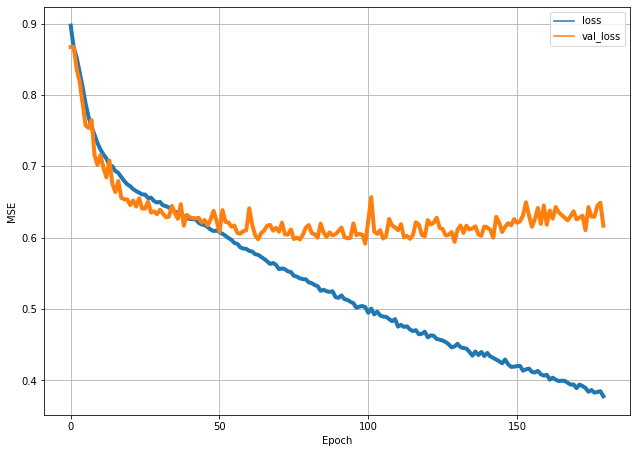

In [14]:
lws = [4, 4]
ax=pd.DataFrame(history.history).plot(figsize=(8, 5))
for i, l in enumerate(ax.lines):
    plt.setp(l, linewidth=lws[i])

plt.grid(True)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.rc('font', size=25)
plt.rc('axes', titlesize=25)
fig = plt.gcf()
fig.set_size_inches(10.5, 7.5)
fig.savefig('MSE.png', dpi=600,bbox_inches = 'tight')
plt.show()


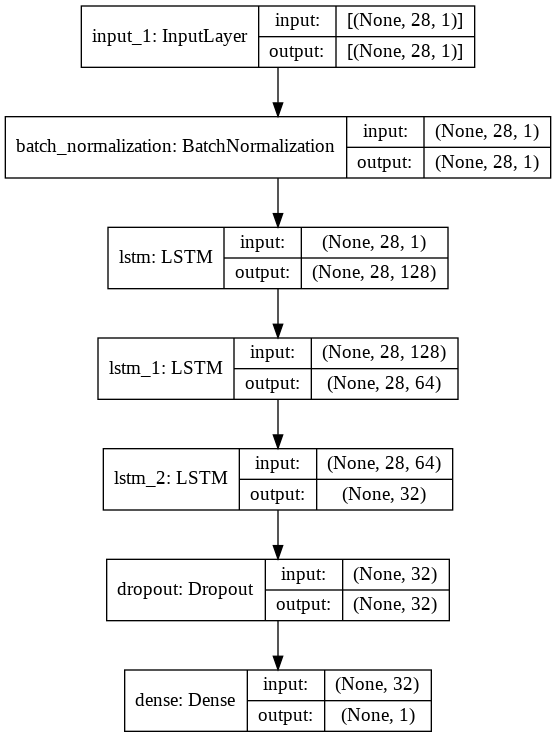

In [15]:
from keras.utils.vis_utils import plot_model
plot_model(R_model_H,  show_shapes=True, show_layer_names=True)

In [21]:
#evaluation
from sklearn.metrics import r2_score

x_num_valid = K.constant(X_valid[:,2:])


o_valid_hat=R_model_H.predict(x=x_num_valid)

coefficient_of_dermination = r2_score(y_valid, o_valid_hat)
print(coefficient_of_dermination)

0.38313315058647424


In [22]:

ybar = np.sum(y_valid)/len(y_valid) 

In [23]:
ssreg = np.sum((o_valid_hat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
sstot = np.sum((y_valid - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
print(ssreg / sstot)

0.5456746616932686


In [18]:
#evaluation
from sklearn.metrics import r2_score

x_num_test = K.constant(X_test[:,2:])

# x_str_test = [tokenize_reviews(commit_msg) for commit_msg in X_test[:,1]]
print(x_num_test.shape)
# for i in range(len(x_str_test)):
#   if (len(x_str_test[i]) <max_length):
#     #padding
#     x_str_test[i].extend([0]*(max_length-len(x_str_test[i])))
#   else:
#     x_str_test[i] = x_str_test[i][:max_length]

# print(np.array(x_str_test).shape)

o_test_hat=R_model_H.predict(x=x_num_test)
coefficient_of_dermination_test = r2_score(y_test, o_test_hat)
print(coefficient_of_dermination_test)

(48033, 28)
0.32284309140178435


In [19]:
ybar = np.sum(y_test)/len(y_test) 
ssreg = np.sum((o_test_hat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
sstot = np.sum((y_test - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
print(ssreg / sstot)

0.49443904451106546
